In [1]:
import numpy
import math
import numpy as np

In [2]:
stepsize = 2000
epoch_counter = 10
maxLR = 0.006
baseLR = 0.001

In [3]:
def CLA_triangular(baseLR,iteration):
    cycle = math.floor(1+iteration/(2*stepsize))
    x = math.fabs(iteration/stepsize - 2*cycle + 1)
    baseLR = baseLR +(maxLR - baseLR)*max(0,(1-x))
    return baseLR

In [4]:
def CLA_triangular2(baseLR,iteration):
    cycle = math.floor(1+iteration/(2*stepsize))
    x = math.fabs(iteration/stepsize - 2*cycle + 1)
    baseLR = baseLR +(maxLR - baseLR)*max(0,(1-x))*0.5**(math.floor((iteration % (stepsize*epoch_counter))/(stepsize*2)))
    return baseLR

In [5]:
def CLA_gamma(baseLR,iteration,gamma):
    cycle = math.floor(1+iteration/(2*stepsize))
    x = math.fabs(iteration/stepsize - 2*cycle + 1)
    baseLR = baseLR +(maxLR - baseLR)*max(0,(1-x))*gamma**(math.floor((iteration % (stepsize*epoch_counter))/(stepsize*2)))
    return baseLR

In [6]:
result_tr = np.array([baseLR])
result_tr2 = np.array([baseLR])
result_gamma = np.array([baseLR])

In [7]:
for i in range(stepsize*epoch_counter*2):
    lr1 = CLA_triangular(baseLR,i)
    lr2 = CLA_triangular2(baseLR,i)
    lr3 = CLA_gamma(baseLR,i,0.8)
    result_tr = np.append(result_tr,lr1)
    result_tr2 = np.append(result_tr2,lr2)
    result_gamma = np.append(result_gamma,lr3)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

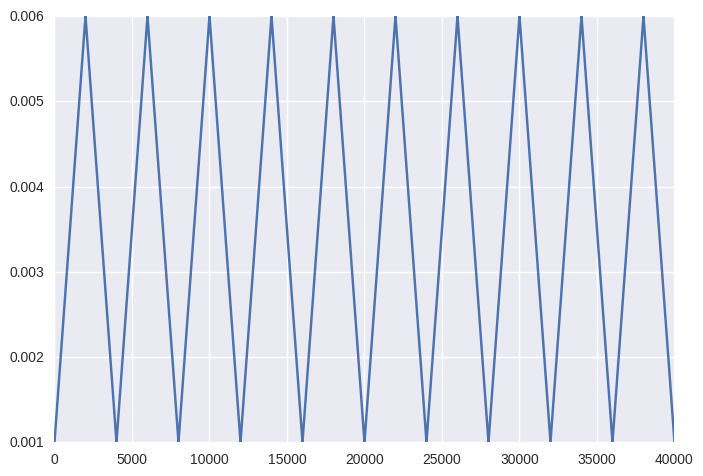

In [9]:
plt.plot(result_tr)
plt.show()

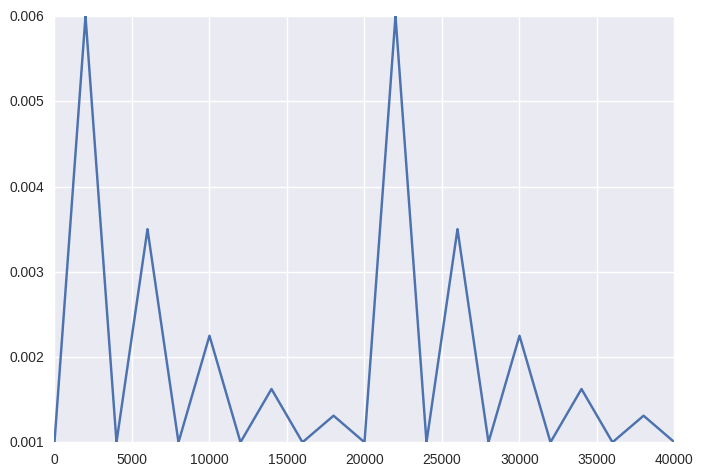

In [10]:
plt.plot(result_tr2)
plt.show()

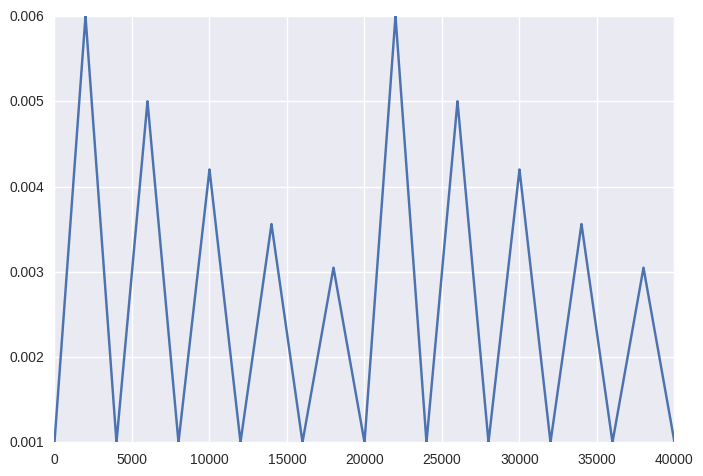

In [11]:
plt.plot(result_gamma)
plt.show()